<a href="https://colab.research.google.com/github/Samer98/Children-vs-Adults-Classification/blob/main/Adults_Vs_Childeren_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn

print(torch.__version__)

device = "cuda" if torch.cuda.is_available() else "cpu"
device

1.12.1+cu113


'cuda'

In [2]:
import requests
import zipfile
from pathlib import Path

data_path =Path("data/")
image_path = data_path/"Adults_Children"
image_path
if image_path.is_dir():
  print("Path is exist")
else:
  print(f"Did not find {image_path} directory, creating one...")
  image_path.mkdir(parents=True,exist_ok=True)
  with open (data_path/"train.zip","wb") as f:
    request = requests.get("https://github.com/Samer98/Children-vs-Adults-Classification/raw/main/train.zip")
    print("Downloading train Adults and childeren images")
    f.write(request.content)

  with zipfile.ZipFile(data_path/"train.zip","r") as zip_ref:
    print("Unzipping train Adults and childeren images")
    zip_ref.extractall(image_path)

  with open (data_path/"test.zip","wb") as f:
    request = requests.get("https://github.com/Samer98/Children-vs-Adults-Classification/raw/main/test.zip")
    print("Downloading test Adults and childeren images")
    f.write(request.content)

  with zipfile.ZipFile(data_path/"test.zip","r") as zip_ref:
    print("Unzipping test Adults and childeren images")
    zip_ref.extractall(image_path)


Did not find data/Adults_Children directory, creating one...
Unzipping train Adults and childeren images
Unzipping test Adults and childeren images


In [3]:
train_dir = image_path/"train"
test_dir = image_path/"test"
train_dir,test_dir

(PosixPath('data/Adults_Children/train'),
 PosixPath('data/Adults_Children/test'))

image Path data/Adults_Children/train/adults/321.jpg
image class adults
image height 320
image width 370


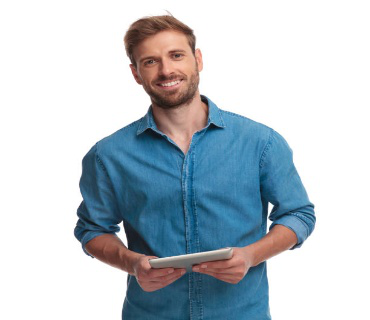

In [4]:
import random
from PIL import Image

random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list

random_image_path = random.choice(image_path_list)
image_class = random_image_path.parent.stem
image = Image.open(random_image_path)
print(f"image Path {random_image_path}")
print(f"image class {image_class}")
print(f"image height {image.height}")
print(f"image width {image.width}")
image

In [5]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms ,models

#Write transform for image

data_transform= transforms.Compose([
    transforms.Resize(size=(64,64)), # Resize the images to 64x64
    # transforms.TrivialAugmentWide(10), # Add data agumention to images extermly since using bins = 31
    transforms.ToTensor() # Turn the image into a torch.Tensor

])

In [6]:
import matplotlib.pyplot as plt

def plot_transformed_images(image_paths,transform,n=3,seed=42):
  random.seed(seed)

  random_image_paths = random.sample(image_paths,k=n)
  print(random_image_paths)
  for image in random_image_paths:
    choice_image_path = image
    image_class_name = choice_image_path.parent.stem
    choice_image = Image.open(choice_image_path)
    fig , ax = plt.subplots(1,2)
    ax[0].imshow(choice_image)
    ax[0].set_title("Orginal image Size")
    ax[0].axis("off")

    # Transform and plot image
    # Note: permute() will change shape of image to suit matplotlib 
    # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
    transformed_image = transform(choice_image).permute(1,2,0)
    ax[1].imshow(transformed_image)
    ax[1].set_title(" Transformed image Size")
    ax[1].axis("off")


    fig.suptitle(f"Class: {choice_image_path.parent.stem}", fontsize=16)

[PosixPath('data/Adults_Children/train/children/213.jpg'), PosixPath('data/Adults_Children/train/adults/190.jpg'), PosixPath('data/Adults_Children/train/adults/81.jpg')]


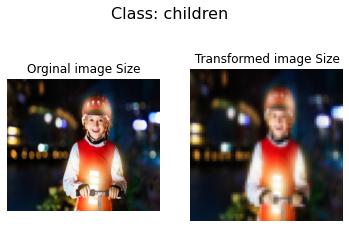

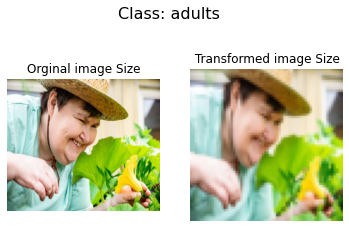

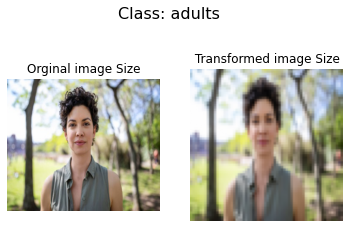

In [7]:
plot_transformed_images(image_path_list,data_transform,n=3,seed=1)

In [8]:
# Use ImageFolder to create dataset(s)
train_dataset = datasets.ImageFolder(root= train_dir,
                                     transform=data_transform,
                                     target_transform=None)

test_dataset = datasets.ImageFolder(root= test_dir,
                                     transform=data_transform
                                    )

train_dataset , test_dataset

(Dataset ImageFolder
     Number of datapoints: 680
     Root location: data/Adults_Children/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                ToTensor()
            ), Dataset ImageFolder
     Number of datapoints: 120
     Root location: data/Adults_Children/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
                ToTensor()
            ))

In [9]:
# Turn train and test Datasets into DataLoaders
BATCH_SIZE = 16
train_dataloader = DataLoader(dataset=train_dataset,
                              batch_size = BATCH_SIZE,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_dataset,
                              batch_size = BATCH_SIZE,
                              num_workers=1
                              )
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7efc85f6cdd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7efc85f6ce10>)

In [10]:
image,label = next(iter(train_dataloader))
image,label

(tensor([[[[0.6157, 0.6235, 0.6353,  ..., 0.9843, 0.9843, 0.9843],
           [0.6000, 0.6510, 0.6863,  ..., 0.9843, 0.9843, 0.9843],
           [0.6078, 0.6549, 0.6941,  ..., 0.9843, 0.9843, 0.9843],
           ...,
           [0.4706, 0.6118, 0.7176,  ..., 0.8706, 0.8745, 0.8784],
           [0.4275, 0.6039, 0.7020,  ..., 0.9216, 0.8627, 0.7765],
           [0.3686, 0.5255, 0.6078,  ..., 0.9216, 0.8627, 0.7608]],
 
          [[0.6510, 0.6667, 0.6824,  ..., 0.9843, 0.9843, 0.9843],
           [0.6353, 0.6863, 0.7176,  ..., 0.9843, 0.9843, 0.9843],
           [0.6235, 0.6706, 0.7059,  ..., 0.9843, 0.9843, 0.9843],
           ...,
           [0.5569, 0.6627, 0.7725,  ..., 0.8863, 0.8863, 0.8941],
           [0.5137, 0.6627, 0.7608,  ..., 0.9216, 0.8745, 0.8275],
           [0.4275, 0.5647, 0.6471,  ..., 0.9294, 0.8745, 0.8039]],
 
          [[0.5451, 0.5765, 0.6039,  ..., 0.9922, 0.9922, 0.9922],
           [0.5412, 0.6000, 0.6392,  ..., 0.9922, 0.9922, 0.9922],
           [0.5098, 0.56

In [11]:
class TinyVGG(nn.Module):
  def __init__(self,input_shape,hidden_units,output_shape):
      super().__init__()
      self.conv_block_1 = nn.Sequential(
          nn.Conv2d(in_channels=input_shape,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,stride=2)
      )
      self.conv_block_2 = nn.Sequential(
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,stride=2)
      )
      self.conv_block_3 = nn.Sequential(
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.Conv2d(in_channels=hidden_units,
                    out_channels=hidden_units,
                    kernel_size=3,
                    stride=1,
                    padding=1),
          nn.ReLU(),
          nn.MaxPool2d(kernel_size=2,stride=2)
      )
      self.classifier = nn.Sequential(
          nn.Flatten(),
          nn.Linear(in_features=hidden_units*8*8,
                    out_features= output_shape))
      
  def forward(self,x):
    x = self.conv_block_1(x)
    # print(x.shape)
    x = self.conv_block_2(x)
    # print(x.shape)
    x = self.conv_block_3(x)
    # print(x.shape)
    x = self.classifier(x)
    # print(x.shape)
    return x
    #return self.classifier(self.convo_block_2(self.convo_block_1(x)))

In [12]:
class_names = train_dataset.classes
class_names_dict = train_dataset.class_to_idx
class_names , class_names_dict

(['adults', 'children'], {'adults': 0, 'children': 1})

In [13]:
model_0 = TinyVGG (input_shape=3,
                   hidden_units=10,
                   output_shape=len(class_names)).to(device)

In [14]:
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_fea

the Output logits tensor([[0.0400, 0.0207]], device='cuda:0')
the prediction probablites tensor([[0.5048, 0.4952]], device='cuda:0')
the prediction label adults
the Acutal label children


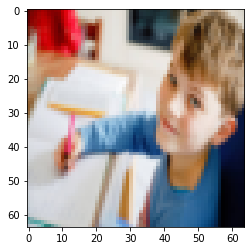

In [15]:
image_batch,label_batch = next(iter(train_dataloader))
img_single , label_single = image_batch[0].unsqueeze(dim=0),label_batch[0]

random.seed(42)
model_0.eval()
with torch.inference_mode():
  pred = model_0(img_single.to(device))
  print(f"the Output logits {pred}")
  print(f"the prediction probablites {torch.softmax(pred,dim=1)}")
  print(f"the prediction label {class_names[torch.argmax(torch.softmax(pred,dim=1))]}")
  print(f"the Acutal label {class_names[label_single]}")
plt.imshow(img_single.squeeze(dim=0).permute(1,2,0))

In [16]:
image_batch.shape

torch.Size([16, 3, 64, 64])

In [17]:
def train_step(model,
               dataloader,
               loss_fn,
               optimizer):
  # Put model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss , train_acc = 0 , 0

  # Loop through data loader data batches
  for batch, (X,y) in enumerate(dataloader):
    X, y = X.to(device) , y.to(device)

    # 1. Forward pass
    y_pred = model(X)

    # 2. Calculate  and accumulate loss
    loss=loss_fn(y_pred,y)
    train_loss += loss.item()

    # 3. optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. optimizer Step
    optimizer.step()

    # Calculate and accumulate accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred,dim=1),dim=1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)
    train_acc

  # Adjust metrics to get average loss and accuracy per batch 
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc

In [18]:
def test_step(model,
              dataloader,
              loss_fn):
  # Put model in eval mode
  model.eval()

  # Setup test loss and test accuracy values
  test_loss, test_acc =0,0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches

    for batch, (X,y) in enumerate(dataloader):

      # Send data to target device
      X,y = X.to(device) , y.to(device)

      # 1. Forward pass
      test_pred_logits = model(X)

      # 2. Calculate and accumulate loss
      loss = loss_fn(test_pred_logits, y)
      test_loss += loss.item()

      # Calculate and accumulate accuracy
      test_pred_labels = test_pred_logits.argmax(dim=1)
      test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

  # Adjust metrics to get average loss and accuracy per batch 
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)
  return test_loss, test_acc

In [19]:
from tqdm.auto import tqdm

# 1. Take in various parameters required for training test steps
def train(model,
          train_dataloader,
          test_dataloader,
          optimizer,
          loss_fn = nn.CrossEntropyLoss(),
          epochs: int=5):


    # 2. Create empty results dictionary
    results = {"train_loss":[],
               "train_acc":[],
               "test_loss":[],
               "test_acc":[],
               }

    # 3. Loop through training and testing steps for a number of epochs 
    for epoch in tqdm (range(epochs)):
      train_loss , train_acc = train_step(model = model,
                                          dataloader=train_dataloader,
                                          loss_fn=loss_fn,
                                          optimizer=optimizer)    
      test_loss , test_acc = test_step(model = model,
                                          dataloader=test_dataloader,
                                          loss_fn=loss_fn)   
      
      # 4. Print out what's happening
      print( f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

    # 5. Update results dictionary
      results["train_loss"].append(train_loss)
      results["train_acc"].append(train_acc)
      results["test_loss"].append(test_loss)
      results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [20]:
NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),lr=0.01)

model_1 = models.resnet18(pretrained=True)
num_ftrs = model_1.fc.in_features
# Here the size of each output sample is set to 2.
# Alternatively, it can be generalized to nn.Linear(num_ftrs, len(class_names)).
model_1.fc = nn.Linear(num_ftrs, 2)

model_1 = model_1.to(device)
model_1_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs= NUM_EPOCHS)

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6945 | train_acc: 0.5015 | test_loss: 0.6952 | test_acc: 0.4688
Epoch: 2 | train_loss: 0.6940 | train_acc: 0.4637 | test_loss: 0.6937 | test_acc: 0.4688
Epoch: 3 | train_loss: 0.6936 | train_acc: 0.5029 | test_loss: 0.6922 | test_acc: 0.5312
Epoch: 4 | train_loss: 0.6933 | train_acc: 0.4840 | test_loss: 0.6932 | test_acc: 0.4688
Epoch: 5 | train_loss: 0.6945 | train_acc: 0.5044 | test_loss: 0.6924 | test_acc: 0.5312


In [21]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 5

model_0 = TinyVGG (input_shape=3,
                   hidden_units=1000,
                   output_shape=len(class_names)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(),lr=0.01)

from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs= NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 5318794.8498 | train_acc: 0.4956 | test_loss: 160.1220 | test_acc: 0.5469
Epoch: 2 | train_loss: 60.6837 | train_acc: 0.5305 | test_loss: 23.6973 | test_acc: 0.4766
Epoch: 3 | train_loss: 35.2969 | train_acc: 0.5029 | test_loss: 16.8431 | test_acc: 0.4766
Epoch: 4 | train_loss: 3.4849 | train_acc: 0.4855 | test_loss: 0.8213 | test_acc: 0.5078
Epoch: 5 | train_loss: 0.7134 | train_acc: 0.4971 | test_loss: 0.6982 | test_acc: 0.5312
Total training time: 92.188 seconds


In [22]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss']
    test_loss = results['test_loss']

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

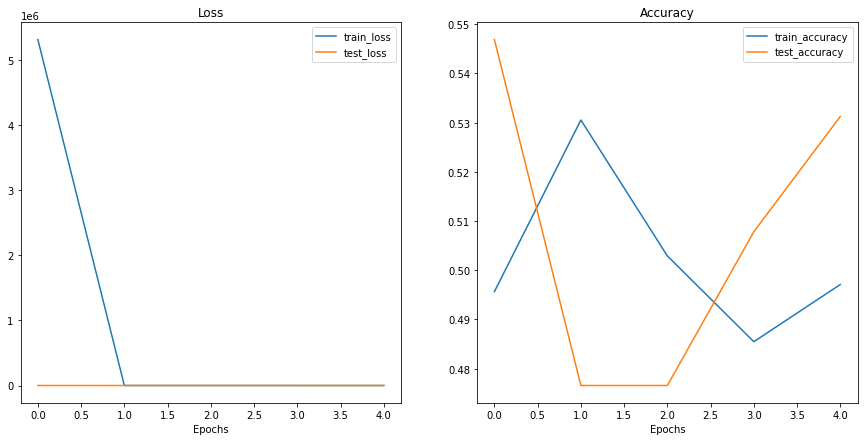

In [23]:
plot_loss_curves(model_0_results)


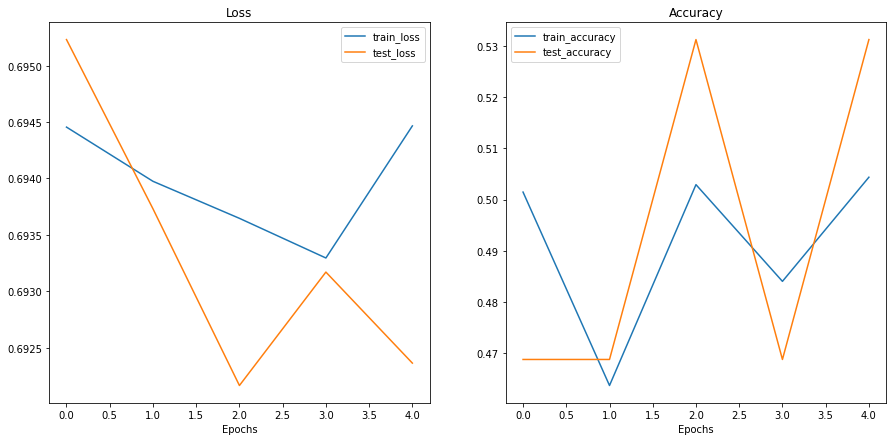

In [24]:
plot_loss_curves(model_1_results)

In [25]:
import requests

# Setup custom image path
custom_image_path = data_path / "04-pizza-dad.jpeg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/04-pizza-dad.jpeg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")
    

Custom image transformed shape: torch.Size([3, 64, 64])
Unsqueezed custom image shape: torch.Size([1, 3, 64, 64])
Prediction logits: tensor([[-0.0323,  0.0310]], device='cuda:0')
Prediction probabilities: tensor([[0.4842, 0.5158]], device='cuda:0')
Prediction label: tensor([1], device='cuda:0')


'children'

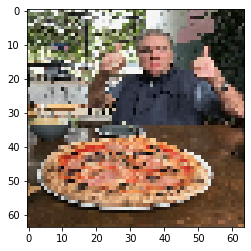

In [26]:
import torchvision


# Load in custom image and convert the tensor values to float32
custom_image = torchvision.io.read_image(str(custom_image_path)).type(torch.float32)

# Divide the image pixel values by 255 to get them between [0, 1]
custom_image = custom_image / 255. 


custom_image_transform = transforms.Compose([
    transforms.Resize((64, 64)),
])

# Transform target image
custom_image_transformed = custom_image_transform(custom_image)

model_0.eval()
with torch.inference_mode():
    # Add an extra dimension to image
    custom_image_transformed_with_batch_size = custom_image_transformed.unsqueeze(dim=0)
    
    # Print out different shapes
    print(f"Custom image transformed shape: {custom_image_transformed.shape}")
    print(f"Unsqueezed custom image shape: {custom_image_transformed_with_batch_size.shape}")
    
    # Make a prediction on image with an extra dimension
    custom_image_pred = model_0(custom_image_transformed.unsqueeze(dim=0).to(device))
# Print out prediction logits
print(f"Prediction logits: {custom_image_pred}")

# Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
custom_image_pred_probs = torch.softmax(custom_image_pred, dim=1)
print(f"Prediction probabilities: {custom_image_pred_probs}")

# Convert prediction probabilities -> prediction labels
custom_image_pred_label = torch.argmax(custom_image_pred_probs, dim=1)
print(f"Prediction label: {custom_image_pred_label}")
custom_image_pred_class = class_names[custom_image_pred_label.cpu()] # put pred label to CPU, otherwise will error
plt.imshow(custom_image_transformed.permute(1,2,0))
custom_image_pred_class

In [27]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights from pretraining on ImageNet
weights

EfficientNet_B0_Weights.IMAGENET1K_V1

In [28]:
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[256]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BICUBIC
)

In [29]:
# Use ImageFolder to create dataset(s)

train_data = datasets.ImageFolder(root = train_dir, # target folder of images
                                  transform=auto_transforms, # transforms to perform on data (images)
                                  target_transform=None)  # transforms to perform on labels (if necessary)

test_data = datasets.ImageFolder(root = test_dir,
                                 transform = auto_transforms)
print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 680
    Root location: data/Adults_Children/train
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[256]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BICUBIC
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 120
    Root location: data/Adults_Children/test
    StandardTransform
Transform: ImageClassification(
               crop_size=[224]
               resize_size=[256]
               mean=[0.485, 0.456, 0.406]
               std=[0.229, 0.224, 0.225]
               interpolation=InterpolationMode.BICUBIC
           )


In [30]:
# Turn train and test Datasets into DataLoaders
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=32, # how many samples per batch?
                              num_workers=1, # how many subprocesses to use for data loading? (higher = more)
                              shuffle=True) # shuffle the data?

test_dataloader = DataLoader(dataset=test_data, 
                             batch_size=32, 
                             num_workers=1, 
                             shuffle=False) # don't usually need to shuffle testing data

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7efc80b29550>,
 <torch.utils.data.dataloader.DataLoader at 0x7efc80b298d0>)

In [31]:
weights = torchvision.models.EfficientNet_B0_Weights.DEFAULT # .DEFAULT = best available weights 
model = torchvision.models.efficientnet_b0(weights=weights).to(device)


Downloading: "https://download.pytorch.org/models/efficientnet_b0_rwightman-3dd342df.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b0_rwightman-3dd342df.pth


  0%|          | 0.00/20.5M [00:00<?, ?B/s]

In [32]:
for param in model.features.parameters():
    param.requires_grad = False


In [46]:
output_shape = len(class_names)

model.classifier = torch.nn.Sequential(
    torch.nn.Dropout(p=0.2, inplace=True), 
    torch.nn.Linear(in_features=1280, 
                    out_features=output_shape, # same number of output units as our number of classes
                    bias=True)).to(device)

In [47]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

NUM_EPOCHS = 30

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

from timeit import default_timer as timer
start_time = timer()

model_0_results = train(model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer = optimizer,
                        loss_fn = loss_fn,
                        epochs= NUM_EPOCHS)

end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.6330 | train_acc: 0.6491 | test_loss: 0.5608 | test_acc: 0.7266
Epoch: 2 | train_loss: 0.4910 | train_acc: 0.7699 | test_loss: 0.5454 | test_acc: 0.6667
Epoch: 3 | train_loss: 0.4330 | train_acc: 0.8338 | test_loss: 0.5103 | test_acc: 0.6771
Epoch: 4 | train_loss: 0.3911 | train_acc: 0.8523 | test_loss: 0.4816 | test_acc: 0.7578
Epoch: 5 | train_loss: 0.3741 | train_acc: 0.8466 | test_loss: 0.4750 | test_acc: 0.7500
Epoch: 6 | train_loss: 0.3669 | train_acc: 0.8509 | test_loss: 0.4817 | test_acc: 0.7292
Epoch: 7 | train_loss: 0.3509 | train_acc: 0.8764 | test_loss: 0.4789 | test_acc: 0.7135
Epoch: 8 | train_loss: 0.3556 | train_acc: 0.8423 | test_loss: 0.4727 | test_acc: 0.7552
Epoch: 9 | train_loss: 0.3262 | train_acc: 0.8750 | test_loss: 0.4857 | test_acc: 0.7396
Epoch: 10 | train_loss: 0.3211 | train_acc: 0.8764 | test_loss: 0.4668 | test_acc: 0.7812
Epoch: 11 | train_loss: 0.2943 | train_acc: 0.8920 | test_loss: 0.4726 | test_acc: 0.7760
Epoch: 12 | train_l

In [48]:
from typing import List, Tuple

from PIL import Image

# 1. Take in a trained model, class names, image path, image size, a transform and target device
def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str, 
                        class_names: List[str],
                        image_size: Tuple[int, int] = (224, 224),
                        transform: torchvision.transforms = None,
                        device: torch.device=device):
    
    
    # 2. Open image
    img = Image.open(image_path)

    # 3. Create transformation for image (if one doesn't exist)
    if transform is not None:
        image_transform = transform
    else:
        image_transform = transforms.Compose([
            transforms.Resize(image_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225]),
        ])

    ### Predict on image ### 

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
      # 6. Transform and add an extra dimension to image (model requires samples in [batch_size, color_channels, height, width])
      transformed_image = image_transform(img).unsqueeze(dim=0)

      # 7. Make a prediction on image with an extra dimension and send it to the target device
      target_image_pred = model(transformed_image.to(device))

    # 8. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 9. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 10. Plot image with predicted label and probability 
    plt.figure()
    plt.imshow(img)
    plt.title(f"Pred: {class_names[target_image_pred_label]} | Prob: {target_image_pred_probs.max():.3f}")
    plt.axis(False);

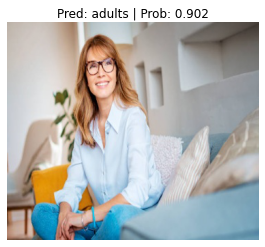

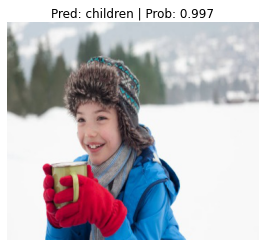

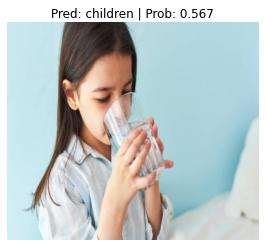

In [49]:
import random
num_images_to_plot = 3
test_image_path_list = list(Path(test_dir).glob("*/*.jpg")) # get list all image paths from test data 
test_image_path_sample = random.sample(population=test_image_path_list, # go through all of the test image paths
                                       k=num_images_to_plot) # randomly select 'k' image paths to pred and plot

# Make predictions on and plot the images
for image_path in test_image_path_sample:
    pred_and_plot_image(model=model, 
                        image_path=image_path,
                        class_names=class_names,
                        # transform=weights.transforms(), # optionally pass in a specified transform from our pretrained model weights
                        image_size=(224, 224))